In [1]:
library(caret)
library(plot3D)
library(ggplot2)

Loading required package: lattice
Loading required package: ggplot2


In [3]:
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

In [4]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Moyenne des variables descriptives par espèce 

In [5]:
aggregate(iris[,1:4], list(iris$Species), FUN=mean)

Group.1    Sepal.Length Sepal.Width Petal.Length Petal.Width
1 setosa     5.006        3.428       1.462        0.246      
2 versicolor 5.936        2.770       4.260        1.326      
3 virginica  6.588        2.974       5.552        2.026

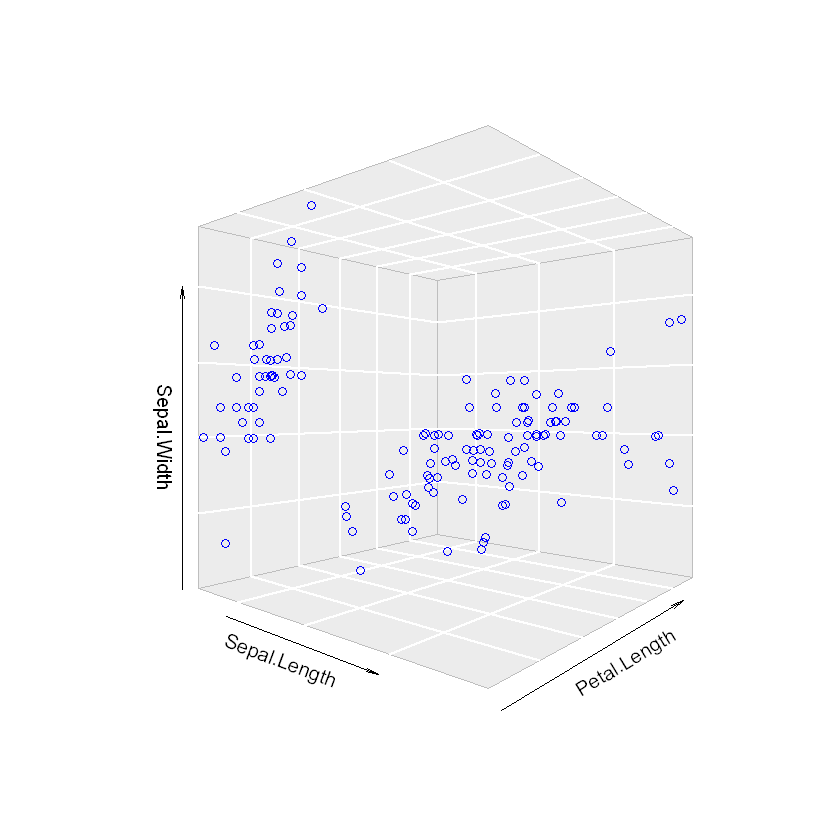

In [6]:
scatter3D(
    iris$Sepal.Length,iris$Petal.Length, iris$Sepal.Width, 
    phi = 0, bty ="g", col="blue", scale=T,
    xlab = "Sepal.Length", ylab = "Petal.Length", zlab = "Sepal.Width"
)

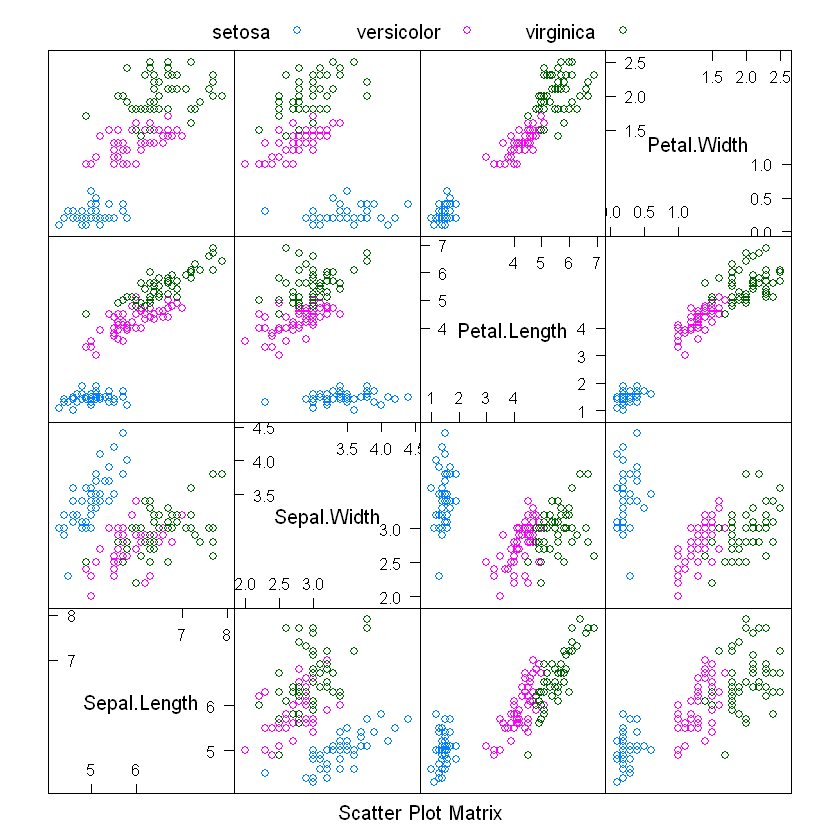

In [7]:
featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "pairs",
            ## Add a key at the top
            auto.key = list(columns = 3))

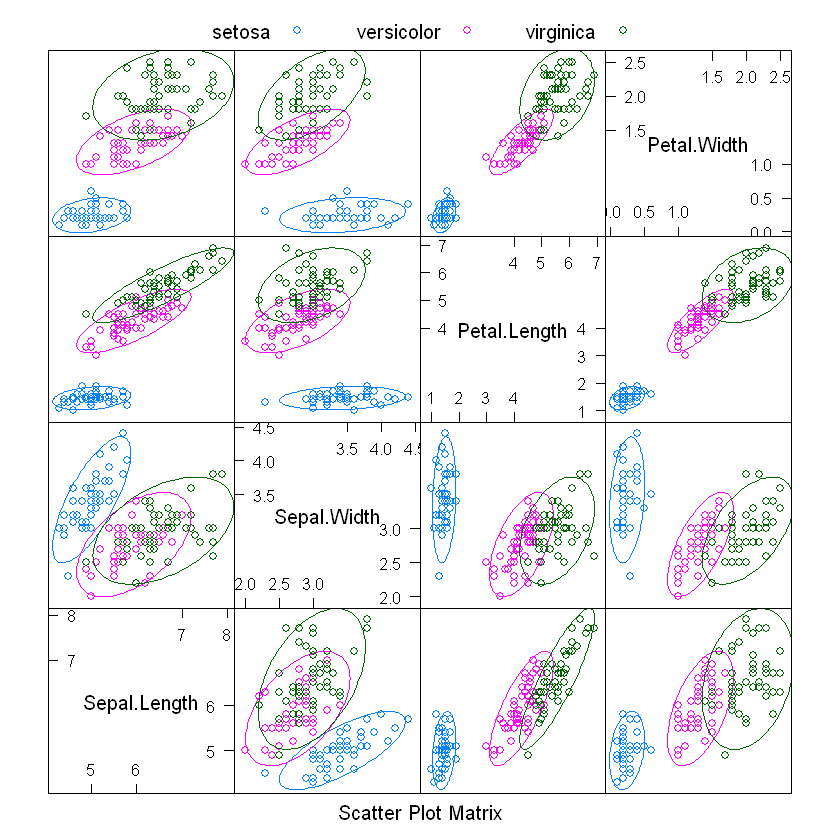

In [8]:
featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "ellipse",
            ## Add a key at the top
            auto.key = list(columns = 3))

In [9]:
mm <- kmeans(iris[,1:4],3)

In [10]:
names(mm)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [11]:
mm$cluster

[1] 3 2 2 2 3 3 3 3 2 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 2 2 3 3 3 2 3 3
 [38] 3 2 3 3 2 2 3 3 2 3 2 3 3 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

In [12]:
table(mm$cluster,iris$Species)

   
    setosa versicolor virginica
  1      0         46        50
  2     17          4         0
  3     33          0         0

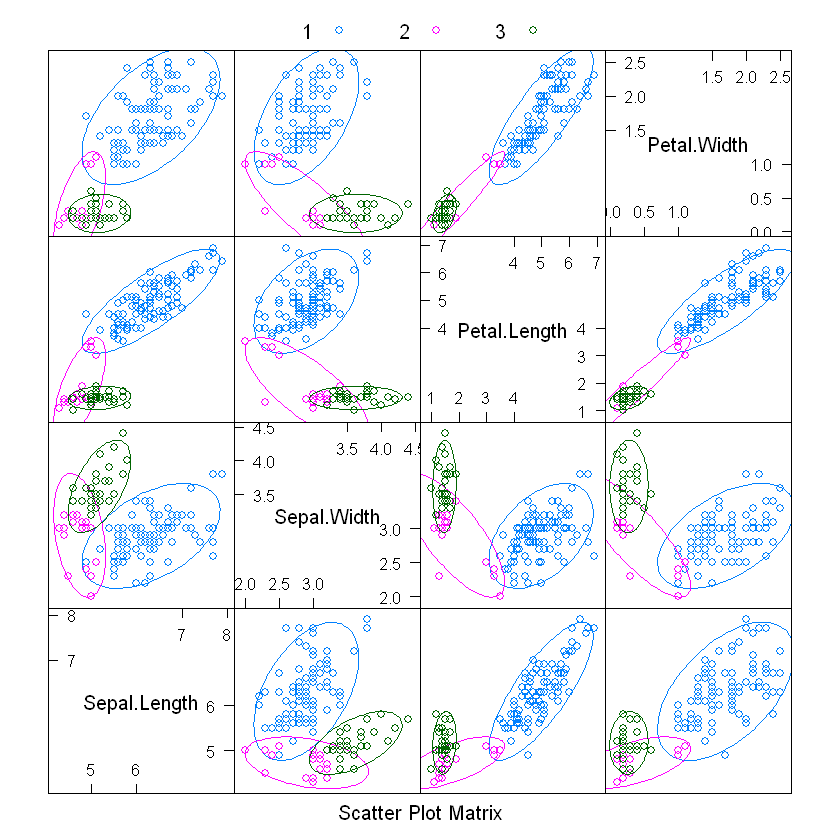

In [14]:
featurePlot(x = iris[, 1:4], 
            y = factor(mm$cluster), 
            plot = "ellipse",
            ## Add a key at the top
            auto.key = list(columns = 3))

# Régression Versus Classification 

Classification: Il s'agit de trouver une valeur discrète par exemple la class d'un ensemble de points 

Régression: il s'agit de trouver une valeur continue

In [42]:
head(mtcars)

mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1   
                  LiterPer100
Mazda RX4         11.30952   
Mazda RX4 Wag     11.30952   
Datsun 710        10.41667   
Hornet 4 Drive    11.09813   
Hornet Sportabout 12.70053   
Valiant           13.12155

In [43]:
mtcars$LiterPer100 <- 100/mtcars$mpg*3.8/1.6
mtcars$dispLiter <- mtcars$disp*16.38/1000

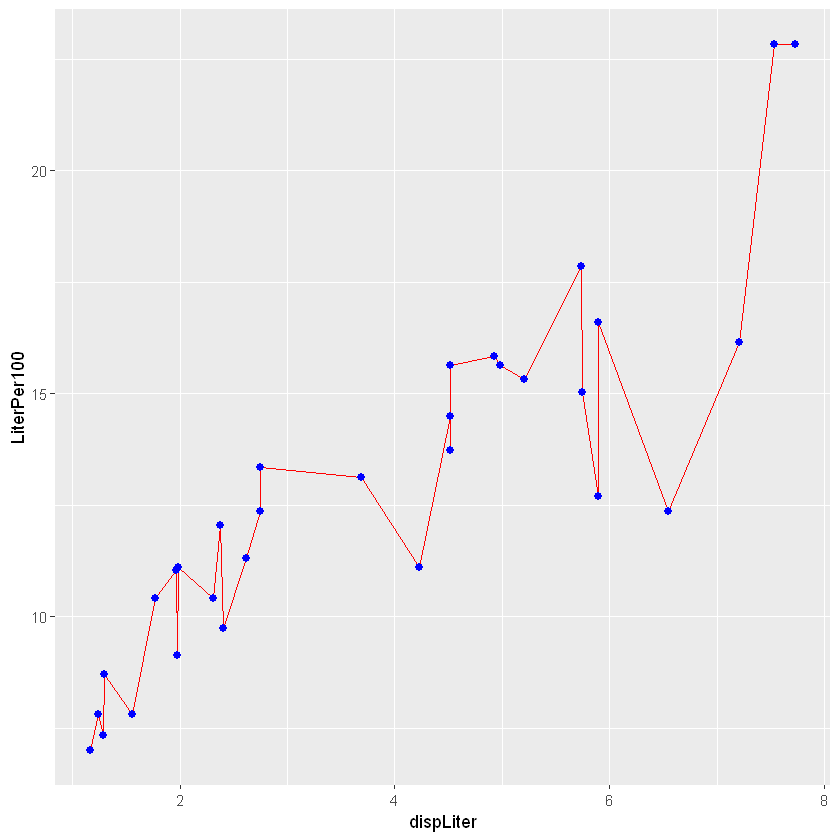

In [44]:
p <- ggplot(mtcars, aes(dispLiter, LiterPer100))
p <- p + geom_line(colour = "red") 
p <- p + geom_point(colour = "blue", size = 2) 
show(p)

In [45]:
droite <- coefficients(glm(LiterPer100~dispLiter,data=mtcars))

In [46]:
p <- p + geom_abline(intercept = droite[1], slope = droite[2], size=1) 

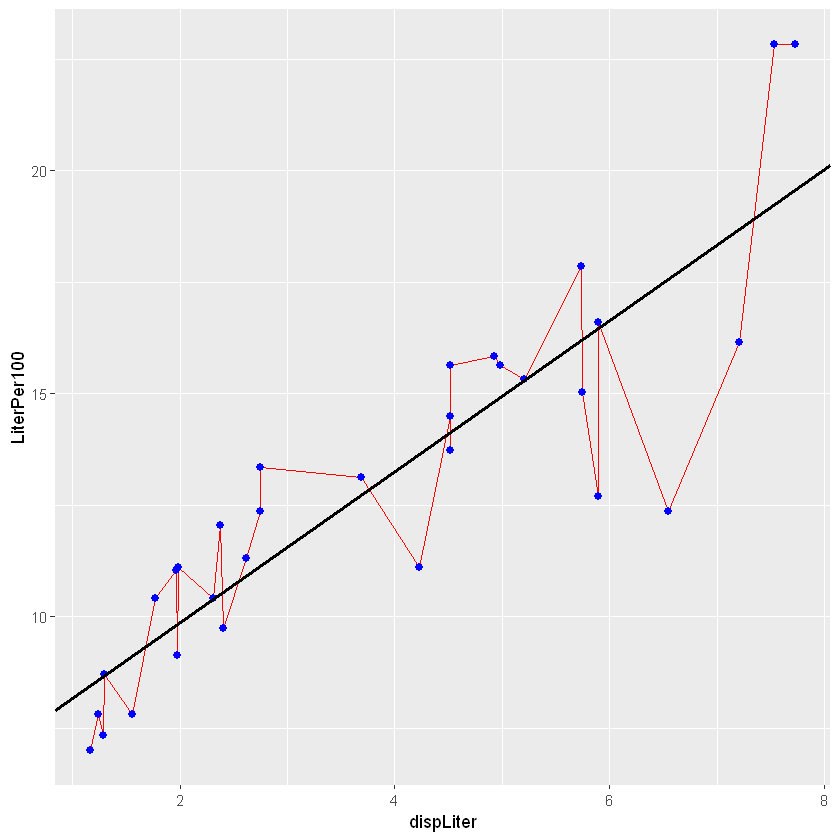

In [47]:
show(p)

In [48]:
droite

(Intercept)   dispLiter 
   6.490041    1.690540

Pour trouver la droite qui passe au mieux entre les points on minimise la fonction suivante:

\begin{align}
rmse = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_{i}-\tilde{y}_{i})}
\end{align}

avec:
 - rmse: root mean sqaure error
 - $y_{i}$: valeur de l'abcisse des points "experimentaux"
 - $\tilde{y}_{i}$: valeur de l'abcisse de la draite 

En ce qui concerne la classiffication on peux proceder d'une manière semblable: on minimise une certaine fonction. Par exemple pour l'olgorithme kmeans on minimise la somme des carrées intra-cluster:


\begin{align}
\underset{S}{arg\,min}\sum_{i=1}^k\sum_{\mathbf{x} \in S}\parallel \mathbf{x}-\mathbf{\mu}_{i} \parallel
\end{align}


![kmeans](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)